# Comparação entre Espanha e Itália, e suas regiões

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
from scipy.signal import find_peaks
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
PATH_DATA_es = '/Users/joaomacedo/Desktop/MiEI/AAII/novo/serie_historica_acumulados.csv'
PATH_DATA_it = '/Users/joaomacedo/Desktop/MiEI/AAII/novo/dpc-covid19-ita-regioni2.csv'

## Preparação dos dados

In [3]:
d_name_es = {
'AN':'Andalucía',
'AR':'Aragón',
'AS':'Asturias',
'IB':'Baleares',
'CN':'Canarias',
'CB':'Cantabria',
'CM':'Castilla La Mancha',
'CL':'Castilla y León',
'CT':'Cataluña',
'CE':'Ceuta',
'VC':'C. Valenciana',
'EX':'Extremadura',
'GA':'Galicia',
'MD':'Madrid',
'ML':'Melilla',
'MC':'Murcia',
'NC':'Navarra',
'PV':'País Vasco',
'RI':'La Rioja'
}

d_ccaa_es = {
'Andalucía': 'Andalucía',
'Aragón': 'Aragón',
'Asturias': 'Principado de Asturias',
'Baleares': 'Islas Baleares',
'Canarias': 'Islas Canarias',
'Cantabria':'Cantabria',
'Castilla La Mancha': 'Castilla-La Mancha',
'Castilla y León': 'Castilla y León',
'Cataluña': 'Cataluña',
'Ceuta': 'Ceuta y Melilla',
'C. Valenciana': 'Comunidad Valenciana',
'Extremadura': 'Extremadura',
'Galicia': 'Galicia',
'Madrid': 'Comunidad de Madrid',
'Melilla': 'Ceuta y Melilla',
'Murcia': 'Región de Murcia',
'Navarra': 'Comunidad Foral de Navarra',
'País Vasco': 'País Vasco',
'La Rioja': 'La Rioja'
}

d_ccaa_id_es = {
'Andalucía': "1",
'Aragón' : "2",
'Principado de Asturias': "3",
'Islas Baleares': "4",
'Islas Canarias': "5",
'Cantabria': "6",
'Castilla-La Mancha': "7",
'Castilla y León': "8",
'Cataluña': "9",
'Ceuta y Melilla': "10",
'Comunidad Valenciana': "11",
'Extremadura': "12",
'Galicia': "13",
'Comunidad de Madrid' : "14",
'Ceuta y Melilla': "15",
'Región de Murcia': "16",
'Comunidad Foral de Navarra': "17",
'País Vasco': "18",
'La Rioja': "19"
}

d_ccaa_population_es = {
'Andalucía': 8414240,
'Aragón' : 1319291,
'Principado de Asturias': 1022800,
'Islas Baleares': 1149460,
'Islas Canarias': 2153389,
'Cantabria': 581078,
'Castilla-La Mancha': 2032863,
'Castilla y León': 2399548,
'Cataluña': 7675217,
'Ceuta y Melilla': 171264,
'Comunidad Valenciana': 5003769,
'Extremadura': 1067710,
'Galicia': 2699499,
'Comunidad de Madrid' : 6663394,
'Ceuta y Melilla': 171264,
'Región de Murcia': 1493898,
'Comunidad Foral de Navarra': 654214,
'País Vasco': 2207776,
'La Rioja': 316798
}

d_name_it = {
'Abruzzo': 'Abruzzo',
'Basilicata': 'Basilicata',
'Calabria': 'Calabria',
'Campania': 'Campania',
'Emilia-Romagna': 'Emilia-Romagna',
'Friuli Venezia Giulia': 'Friuli Venezia Giulia',
'Lazio': 'Lazio',
'Liguria': 'Liguria',
'Lombardia': 'Lombardia',
'Marche': 'Marche',
'Molise': 'Molise',
'Piemonte': 'Piemonte',
'Puglia': 'Puglia',
'Sardegna': 'Sardegna',
'Sicilia': 'Sicilia',
'Toscana': 'Toscana',
'P.A. Bolzano': 'P.A. Bolzano',
'P.A. Trento': 'P.A. Trento',
'Umbria': 'Umbria' ,
'Valle d\'Aosta': 'Valle d\'Aosta',
'Veneto': 'Veneto'
}

regione_id_it = {
'Abruzzo': 1,
'Basilicata' : 2,
'Calabria': 3,
'Campania': 4,
'Emilia-Romagna': 5,
'Friuli Venezia Giulia': 6,
'Lazio': 7,
'Liguria': 8,
'Lombardia': 9,
'Marche': 10,
'Molise': 11,
'Piemonte': 12,
'Puglia': 13,
'Sardegna' : 14,
'Sicilia': 15,
'Toscana': 16,
'P.A. Bolzano': 17,
'P.A. Trento': 18,
'Umbria' : 19,
'Valle d\'Aosta': 20,
'Veneto': 21
}

regione_pop_it = {
'Abruzzo': 1311580,
'Basilicata' : 562869,
'Calabria': 1947131,
'Campania': 5801692,
'Emilia-Romagna': 4459477,
'Friuli Venezia Giulia': 1215220,
'Lazio': 5879082,
'Liguria': 1550640,
'Lombardia': 10060574,
'Marche': 1525271,
'Molise': 305617,
'Piemonte': 4356406,
'Puglia': 4029053,
'Sardegna' : 1639591,
'Sicilia': 4999891,
'Toscana': 3729641,
'P.A. Bolzano': 520891,
'P.A. Trento': 117417,
'Umbria' : 882015,
'Valle d\'Aosta': 125666,
'Veneto': 4905854
}

## Importar os dataframe
Preparação dos dados

In [6]:
df_it = pd.read_csv(PATH_DATA_it, encoding='latin-1')
df_it.fillna(0, inplace = True)
df_it["CCAA"] = df_it["denominazione_regione"].map(d_name_it)
df_it["CCAA_for_Folium"] = df_it["denominazione_regione"].map(d_name_it)
df_it["id"] = df_it["CCAA_for_Folium"].map(regione_id_it)

df_it["Population"] = df_it["CCAA_for_Folium"].map(regione_pop_it)

df_it.rename(columns = {"data":"DATE",
                    "totale_casi":"TOTAL_INFECTED",
                    "totale_ospedalizzati":"REQUIERED_HOSPITALIZATION",
                    "terapia_intensiva":"REQUIERED_ADVANCED_CARE",
                    "deceduti":"TOTAL_DEATHS",
                    "dimessi_guariti":"CURED"}, inplace = True)
df_it["CCAA"].isnull().sum()

0

In [7]:
df_es = pd.read_csv(PATH_DATA_es, encoding='latin-1')
df_es.fillna(0, inplace = True)
df_es["CCAA"] = df_es["CCAA"].map(d_name_es)
df_es["CCAA_for_Folium"] = df_es["CCAA"].map(d_ccaa_es)
df_es["id"] = df_es["CCAA_for_Folium"].map(d_ccaa_id_es)

df_es["Population"] = df_es["CCAA_for_Folium"].map(d_ccaa_population_es)


df_es.rename(columns = {"FECHA":"DATE",
                    "CASOS":"TOTAL_INFECTED",
                    "Hospitalizados":"REQUIERED_HOSPITALIZATION",
                    "UCI":"REQUIERED_ADVANCED_CARE",
                    "Fallecidos":"TOTAL_DEATHS",
                    "Recuperados":"CURED"}, inplace = True)

In [8]:
df_es["CCAA"].isnull().sum()

5

In [10]:
df_es.dropna(inplace = True, axis = "rows") # apagar o texto no fim do ficheiro
df_es["CCAA"].isnull().sum()

0

In [11]:
def correct_date_es(date_str):
    list_dates = date_str.split("/")
    day = list_dates[0]
    month = list_dates[1]
    year = list_dates[2]
    
    if len(day) == 1:
        day = "0" + day
    if len(month) == 1:
        month = "0" + month
        
    return "/".join([day, month, year])

def correct_date_it(date_str):
    list_dates = date_str.split("-")
    day = list_dates[2]
    month = list_dates[1]
    year = list_dates[0]
        
    return "/".join([day, month, year])

In [12]:
df_es["NEW_DATE"] = df_es["DATE"].apply(correct_date_es)
df_es["DATE"] = pd.to_datetime(df_es["NEW_DATE"], format='%d/%m/%Y')
df_es = df_es[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_es["id"].astype(np.int16)
df_es.head()

,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Andalucía,2020-02-20,0.0,0.0,0.0,0.0,0.0,8414240.0
1,2,Aragón,2020-02-20,0.0,0.0,0.0,0.0,0.0,1319291.0
2,3,Asturias,2020-02-20,0.0,0.0,0.0,0.0,0.0,1022800.0
3,4,Baleares,2020-02-20,1.0,0.0,0.0,0.0,0.0,1149460.0
4,5,Canarias,2020-02-20,1.0,0.0,0.0,0.0,0.0,2153389.0


In [14]:
df_it["NEW_DATE"] = df_it["DATE"].apply(correct_date_it)
df_it["DATE"] = pd.to_datetime(df_it["NEW_DATE"], format='%d/%m/%Y')
df_it = df_it[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_it["id"].astype(np.int16)
df_it.head()

,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Abruzzo,2020-02-24,0,0,0,0,0,1311580
1,2,Basilicata,2020-02-24,0,0,0,0,0,562869
2,17,P.A. Bolzano,2020-02-24,0,0,0,0,0,520891
3,3,Calabria,2020-02-24,0,0,0,0,0,1947131
4,4,Campania,2020-02-24,0,0,0,0,0,5801692


In [15]:
df_es["Infected_1000h"] = df_es["TOTAL_INFECTED"]/(df_es["Population"]/1000)
df_es["Mortality_rate"] = df_es["TOTAL_DEATHS"] / df_es["TOTAL_INFECTED"]
df_es.fillna(0, inplace = True)
df_es.head()

,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population,Infected_1000h,Mortality_rate
0,1,Andalucía,2020-02-20,0.0,0.0,0.0,0.0,0.0,8414240.0,0.000000,0.0
1,2,Aragón,2020-02-20,0.0,0.0,0.0,0.0,0.0,1319291.0,0.000000,0.0
2,3,Asturias,2020-02-20,0.0,0.0,0.0,0.0,0.0,1022800.0,0.000000,0.0
3,4,Baleares,2020-02-20,1.0,0.0,0.0,0.0,0.0,1149460.0,0.000870,0.0
4,5,Canarias,2020-02-20,1.0,0.0,0.0,0.0,0.0,2153389.0,0.000464,0.0


In [16]:
df_it["Infected_1000h"] = df_it["TOTAL_INFECTED"]/(df_it["Population"]/1000)
df_it["Mortality_rate"] = df_it["TOTAL_DEATHS"] / df_it["TOTAL_INFECTED"]
df_it.fillna(0, inplace = True)
df_it.head()

,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population,Infected_1000h,Mortality_rate
0,1,Abruzzo,2020-02-24,0,0,0,0,0,1311580,0.0,0.0
1,2,Basilicata,2020-02-24,0,0,0,0,0,562869,0.0,0.0
2,17,P.A. Bolzano,2020-02-24,0,0,0,0,0,520891,0.0,0.0
3,3,Calabria,2020-02-24,0,0,0,0,0,1947131,0.0,0.0
4,4,Campania,2020-02-24,0,0,0,0,0,5801692,0.0,0.0


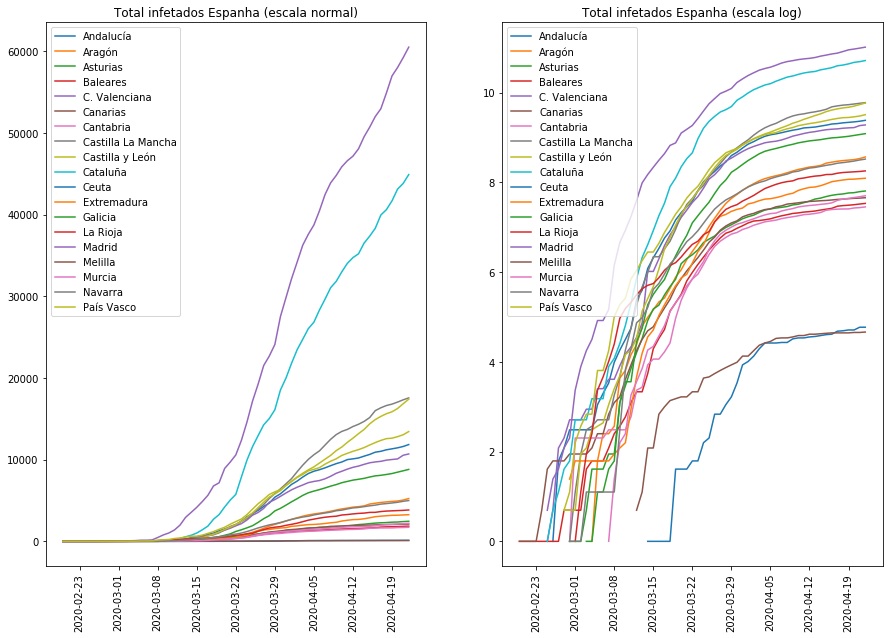

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

for ccaa in sorted(list(df_es["CCAA"].unique())):
    
    x = df_es["DATE"].unique()
    y = df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"]
    y_log = np.log(y)
    
    ax1.plot(x, y, label = ccaa)
    ax1.set_title("Total infetados Espanha (escala normal)")
    ax1.legend()

    ax2.plot(x, y_log, label = ccaa)
    ax2.set_title("Total infetados Espanha (escala log)")
    ax2.legend()
        
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

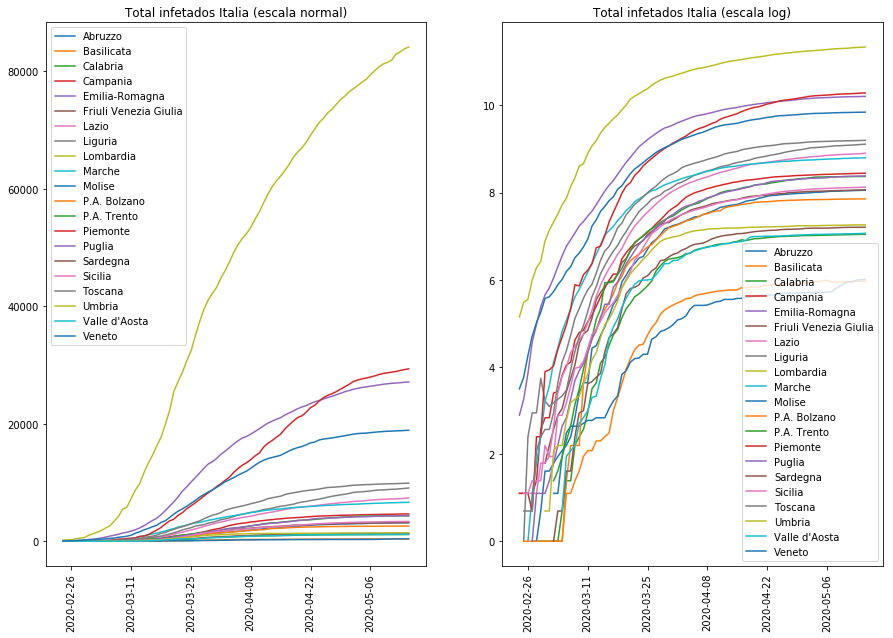

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

for ccaa in sorted(list(df_it["CCAA"].unique())):
    
    x = df_it["DATE"].unique()
    y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"]
    y_log = np.log(y)
    
    ax1.plot(x, y, label = ccaa)
    ax1.set_title("Total infetados Italia (escala normal)")
    ax1.legend()

    ax2.plot(x, y_log, label = ccaa)
    ax2.set_title("Total infetados Italia (escala log)")
    ax2.legend()
        
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

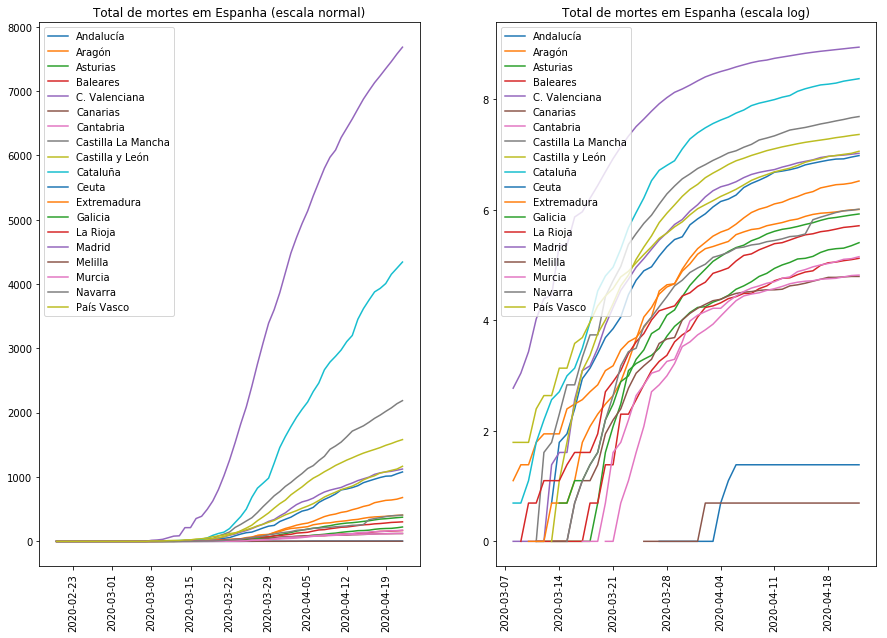

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

for ccaa in sorted(list(df_es["CCAA"].unique())):
    
    x = df_es["DATE"].unique()
    y = df_es[df_es["CCAA"] == ccaa]["TOTAL_DEATHS"]
    y_log = np.log(y)
    
    ax1.plot(x, y, label = ccaa)
    ax1.set_title("Total de mortes em Espanha (escala normal)")
    ax1.legend()

    ax2.plot(x, y_log, label = ccaa)
    ax2.set_title("Total de mortes em Espanha (escala log)")
    ax2.legend()
        
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

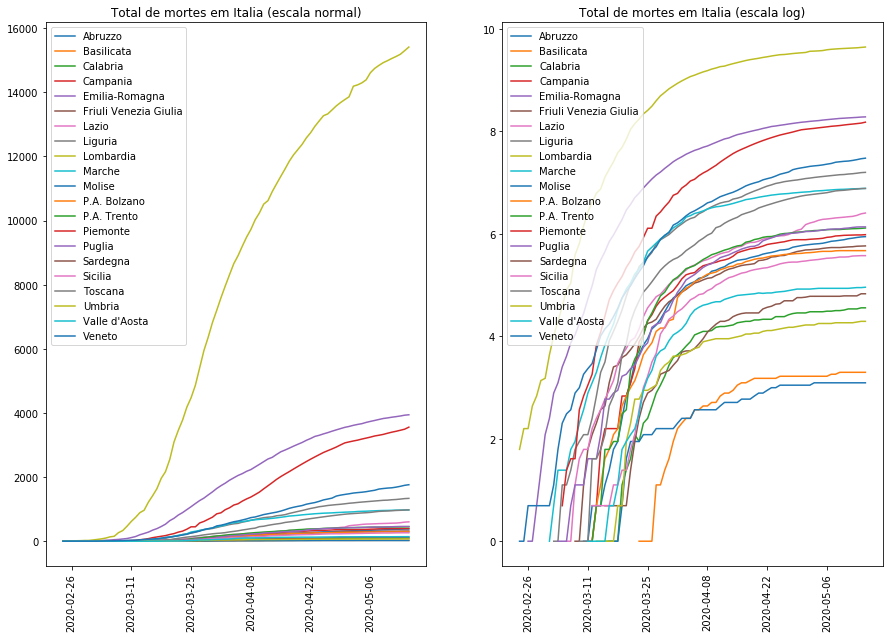

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

for ccaa in sorted(list(df_it["CCAA"].unique())):
    
    x = df_it["DATE"].unique()
    y = df_it[df_it["CCAA"] == ccaa]["TOTAL_DEATHS"]
    y_log = np.log(y)
    
    ax1.plot(x, y, label = ccaa)
    ax1.set_title("Total de mortes em Italia (escala normal)")
    ax1.legend()

    ax2.plot(x, y_log, label = ccaa)
    ax2.set_title("Total de mortes em Italia (escala log)")
    ax2.legend()
        
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)

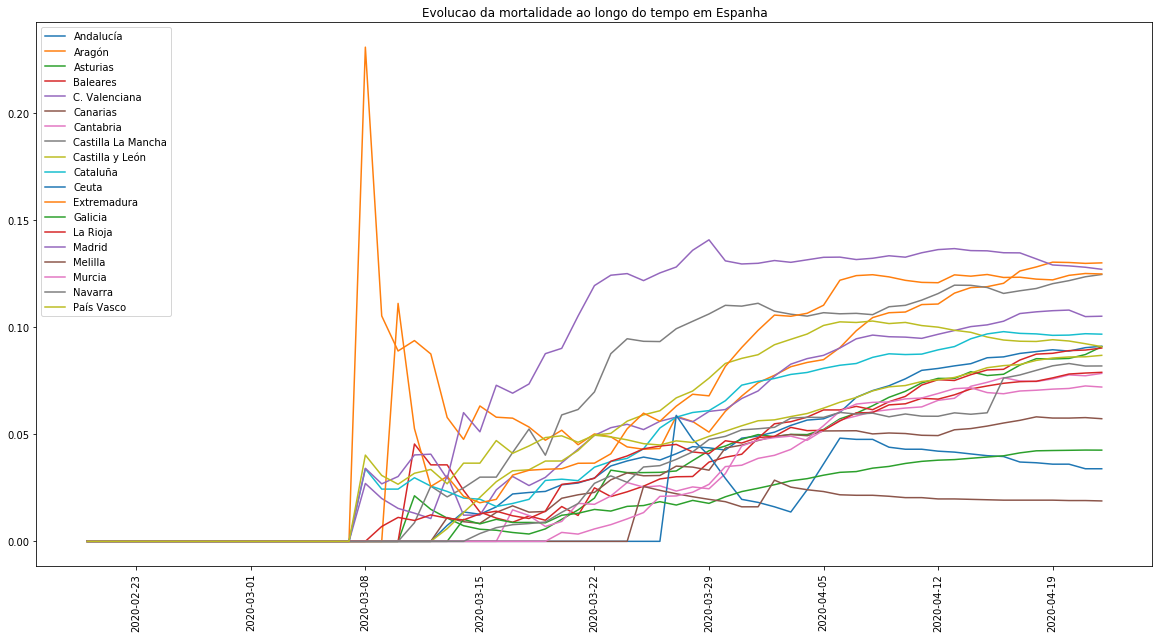

In [25]:
plt.figure(figsize = (20, 10))

for ccaa in sorted(list(df_es["CCAA"].unique())):
    
    x = df_es["DATE"].unique()
    y = df_es[df_es["CCAA"] == ccaa]["Mortality_rate"]
    
    plt.plot(x, y, label = ccaa)
    plt.title("Evolucao da mortalidade ao longo do tempo em Espanha")
    plt.legend()
    plt.xticks(rotation=90)

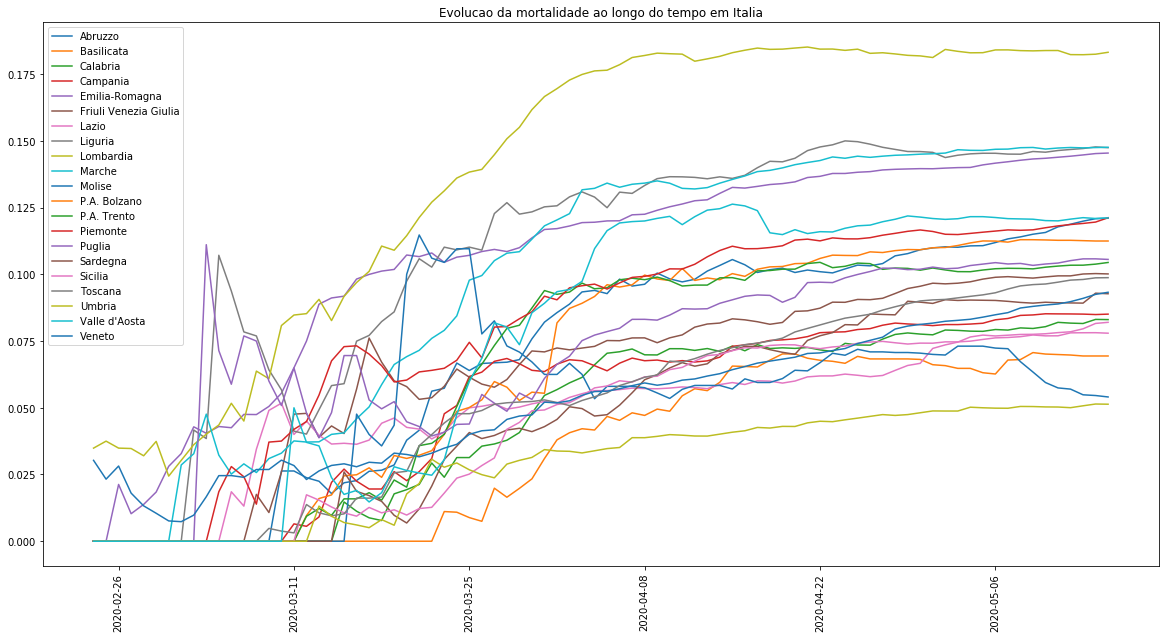

In [26]:
plt.figure(figsize = (20, 10))

for ccaa in sorted(list(df_it["CCAA"].unique())):
    
    x = df_it["DATE"].unique()
    y = df_it[df_it["CCAA"] == ccaa]["Mortality_rate"]
    
    plt.plot(x, y, label = ccaa)
    plt.title("Evolucao da mortalidade ao longo do tempo em Italia")
    plt.legend()
    plt.xticks(rotation=90)

Text(998.875,0.5,'Relacao do total de mortes por 1000 habitantes')

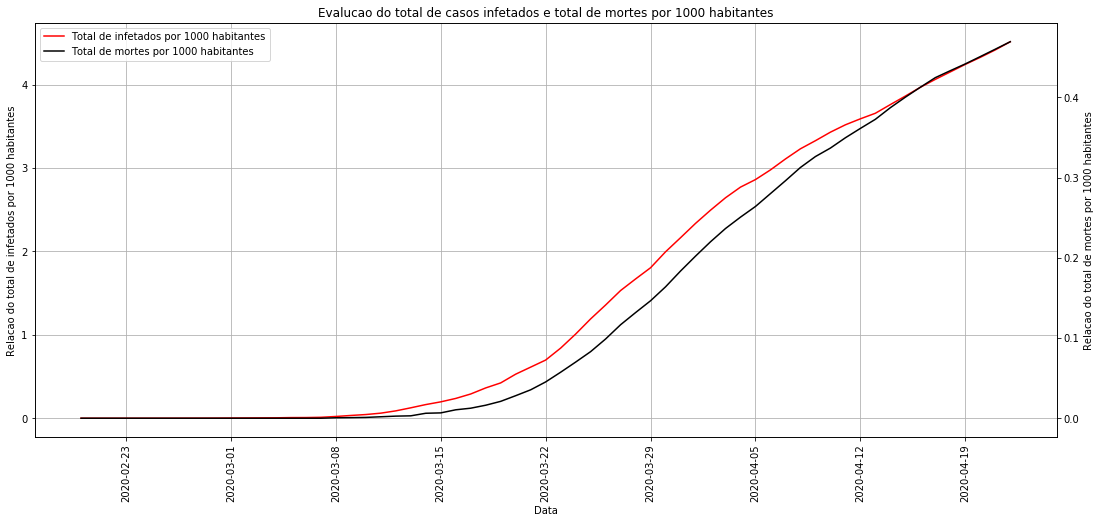

In [29]:
# create the pivot table of total cases
total_df = df_es.set_index("DATE").resample("D")[["TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]].sum()
total_df = total_df[total_df["Population"] > 0]
total_df["TOTAL_INFECTED_1000H"] = total_df["TOTAL_INFECTED"]/(total_df["Population"]/1000)
total_df["TOTAL_DEATHS_1000H"] = total_df["TOTAL_DEATHS"]/(total_df["Population"]/1000)

# get the data
x = list(total_df.index)
y_1 = list(total_df["TOTAL_INFECTED_1000H"]) # 1 axis
y_2 = list(total_df["TOTAL_DEATHS_1000H"]) # 2 axis

# create the figures
fig, ax = plt.subplots(figsize = (15, 7))
plot1 = ax.plot(x, y_1, color = "r", label = "Total de infetados por 1000 habitantes") # plot the first data
plt.xticks(rotation=90) # rotate the date

ax2 = ax.twinx() # create a secondary axis
plot2 = ax2.plot(x, y_2, color = "k", label = "Total de mortes por 1000 habitantes") # plot the second data
fig.tight_layout()
plt.title("Evalucao do total de casos infetados e total de mortes por 1000 habitantes")

# create a common legend
lns = plot1 + plot2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

# prettify
ax.grid()
ax.set_xlabel("Data")
ax.set_ylabel("Relacao do total de infetados por 1000 habitantes")
ax2.set_ylabel("Relacao do total de mortes por 1000 habitantes")

Text(998.875,0.5,'Relacao do total de mortes por 1000 habitantes')

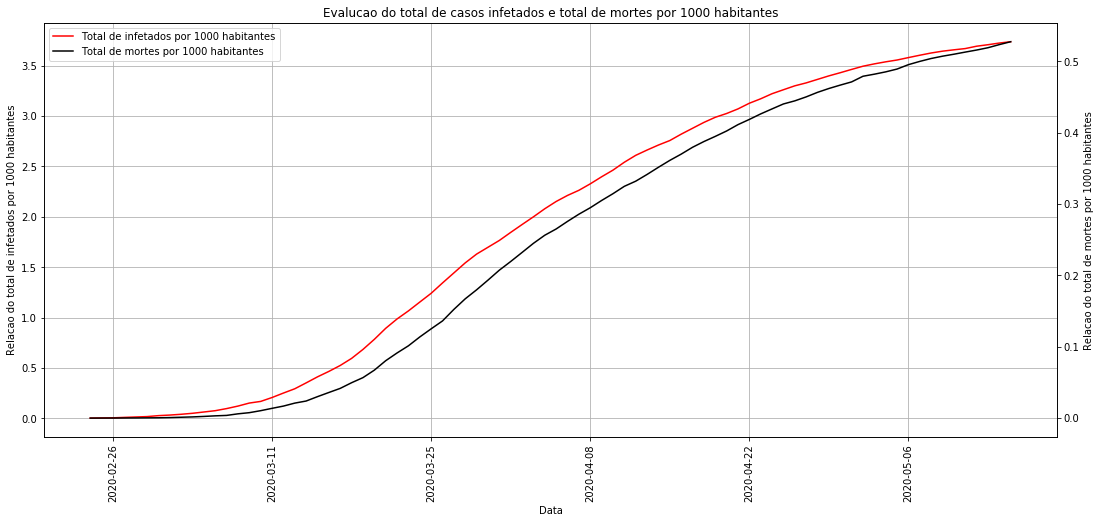

In [30]:
# create the pivot table of total cases
total_df = df_it.set_index("DATE").resample("D")[["TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]].sum()
total_df = total_df[total_df["Population"] > 0]
total_df["TOTAL_INFECTED_1000H"] = total_df["TOTAL_INFECTED"]/(total_df["Population"]/1000)
total_df["TOTAL_DEATHS_1000H"] = total_df["TOTAL_DEATHS"]/(total_df["Population"]/1000)

# get the data
x = list(total_df.index)
y_1 = list(total_df["TOTAL_INFECTED_1000H"]) # 1 axis
y_2 = list(total_df["TOTAL_DEATHS_1000H"]) # 2 axis

# create the figures
fig, ax = plt.subplots(figsize = (15, 7))
plot1 = ax.plot(x, y_1, color = "r", label = "Total de infetados por 1000 habitantes") # plot the first data
plt.xticks(rotation=90) # rotate the date

ax2 = ax.twinx() # create a secondary axis
plot2 = ax2.plot(x, y_2, color = "k", label = "Total de mortes por 1000 habitantes") # plot the second data
fig.tight_layout()
plt.title("Evalucao do total de casos infetados e total de mortes por 1000 habitantes")

# create a common legend
lns = plot1 + plot2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

# prettify
ax.grid()
ax.set_xlabel("Data")
ax.set_ylabel("Relacao do total de infetados por 1000 habitantes")
ax2.set_ylabel("Relacao do total de mortes por 1000 habitantes")